# DATOS MARKETING

# Introducción

Vamos a ponernos en realizar un roleplay de analista de datos. El equipo de ventas y marketing nos ha pedido que las campañas de marketing recientes no han sido tan eficaces como se esperaba. Debemos analizar el conjunto de datos para comprender este problema y proponer soluciones basadas en datos.

### Tareas
¿Hay valores nulos o valores atípicos? ¿Cómo los disputará/manejará?
¿Hay alguna variable que justifique las transformaciones?
¿Hay alguna variable útil que pueda diseñar con los datos proporcionados?
¿Notas algún patrón o anomalía en los datos?
¿Puede representarlo graficamente? (Aquí os ayudaremos)

Importación de librerías



In [4]:
# IMPORTAMOS TODAS LAS LIBRERIAS 
import numpy as np
import pandas as pd
import matplotlib as mtl
import seaborn as sns
import plotly as plt
import matplotlib.pyplot as plt
import plotly.express as px


Lea el dataset

In [5]:
# Cargar los datos desde el archivo CSV en URL
URL = r"C:\Users\34650\Desktop\BOOTCAMP\temario\PROYECTO(MODULO1)\DATOS MARKETIN\datos_marketing.csv"

In [6]:
#Leemos el archivo csv (URL) y creamos un DataFRame(df2)
df2 = pd.read_csv(URL)

In [7]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


Use el comando .info() para ver información del dataset

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Use el comando .head() para ver las columnas
¿Qué observa en la columna 'income'?

In [9]:
#Aqui vemos las primeras 10 filas con toda la informacion de las columnas
df2.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [10]:
#Para ver las columnas que tenemos
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

# Tratamiento de la columna 'income'
# Trate la columna:


Eliminando el espacio del nombre de la columna. Puede usar la función replace.


In [11]:
#Eliminamos los dos espacios que tiene la columna 'Income'
df2 = df2.rename(columns= {' Income ':'Income'})


In [12]:

df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [13]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


 Quite el símbolo del dolar. Puede usar la función replace.


In [14]:
#Le quitamos el signo del dolar, el . que lleva y la , tambien
df2['Income'] = df2['Income'].str.replace('$','')
df2['Income'] = df2['Income'].str.replace('.','')
df2['Income'] = df2['Income'].str.replace(',','')


In [15]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,8483500,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,5709100,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,6726700,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,3247400,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,2147400,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,6647600,0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,3105600,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,4631000,1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,6581900,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


 Cambie la columna al tipo float. Puede usar la función astype(...)

In [16]:
#Pasamos a float

df2['Income'] = df2['Income'].astype(float)


Imprima de nuevo el dataset con .head() y compruebe los resultados

In [17]:
df2.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,8483500.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,5709100.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,6726700.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,3247400.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,2147400.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,7169100.0,0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,6356400.0,0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,4493100.0,0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,6532400.0,0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,6532400.0,0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


Empecemos mirando los valores nulos de las columnas.
Identifique el número de valores nulos en cada columna.

Use el comando isnull() y la combinación de isnull() y sum() para lograrlo.

In [18]:
#Aqui podemos ver todo los valores nulos que tenemos en las columnas
df2.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [19]:
#Para saber que tipo de dato es cada columna
df2.dtypes


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

#### ¿Qué columna tiene valores nulos?¿Cuántos valores nulos ha conseguido detectar?¿En qué columna/s?

En la respuesta anterior vemos que la unica columna que obtenga valores nulos, es Income.
Se han detectado 24 valores nulos como nos enseña en la respuesta de arriba.






#### A continuación use el siguiente código para representar la columna 'Income' y trate de ver qué ocurre.

plt.figure(figsize=(16, 8))
sns.histplot(datos['Income'])
plt.title('Distribucion de la columna "Income"', size=25)
plt.ylabel('Conteo');
Mire en el Eje X, ¿qué identifica en la figura? ¿Ve los valores nulos?

C:\Users\34650\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\34650\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


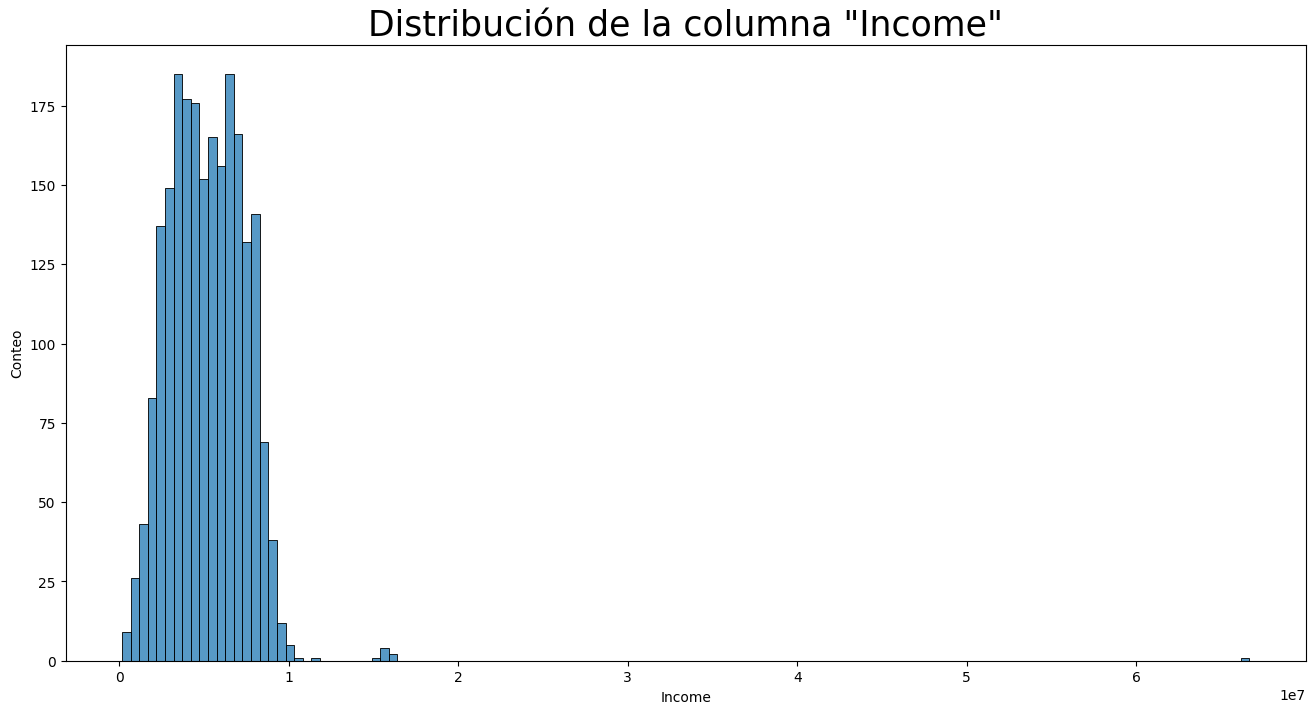

In [20]:
# Creamos un histograma de la columna 'Income' con los datos que nos han dado
plt.figure(figsize=(16, 8))
sns.histplot(df2['Income']) 
plt.title('Distribución de la columna "Income"', size=25)
plt.ylabel('Conteo')
plt.show()



Rellene los valores nulos

Use la mediana de la columna para rellenar aquellos valores nulos.

La mediana puede ser calculada mediante '.median()'

In [21]:
#Para sacar la mediana de la columna 'Income'
mediana_income = df2['Income'].median()



In [22]:
#Aqui podemos ver el valor de la mediana de la columna 'Income'
mediana_income

5138150.0

In [23]:
#Rellenamos aquellos valores nulos con la mediana
df2['Income'].fillna(mediana_income, inplace=True)

In [25]:
#Aqui vemos que toda la suma de valores nulos por columnas nos aparecesn en 0, entonces quiere decir que ya hemos rellenado todos los valores nulos con 0.
df2.isnull().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

¿Requiere alguna columna de realizar una transformación?


Mire la columna Dt_Customer. Cambie el tipo de columna a Datetime.

Puede usar la función to_datetime().

In [26]:
# Para transformar la columna 'Dt_Customer' en datetime
df2['Dt_Customer'] = df2['Dt_Customer'].apply(pd.to_datetime)

In [27]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,8483500.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,5709100.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,6726700.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,3247400.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,2147400.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,6647600.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,3105600.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,4631000.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,6581900.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


Otras tareas de ingeniería de datos que podemos hacer para facilitar la vida al equipo de ventas y marketing¶
Revise una lista de los nombres de columnas a continuación, a partir de los cuales podemos crear nuevas:

Es posible crear una nueva columna con el número total de menores de edad en el hogar (nueva columna 'Dependents') a partir de la suma de 'Kidhome' y 'Teenhome'.







In [28]:
# Creamos una nueva columna 'Dependents' que es la suma de 'Kidhome' y 'Teenhome'
df2['Dependents'] = df2['Kidhome'] + df2['Teenhome']



In [29]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents
0,1826,1970,Graduation,Divorced,8483500.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,0
1,1,1961,Graduation,Single,5709100.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,0
2,10476,1958,Graduation,Married,6726700.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,1
3,1386,1967,Graduation,Together,3247400.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,2
4,5371,1989,Graduation,Single,2147400.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,6647600.0,0,1,2013-03-07,99,372,...,4,0,0,0,0,0,0,0,US,1
2236,5263,1977,2n Cycle,Married,3105600.0,1,0,2013-01-22,99,5,...,8,0,0,0,0,0,0,0,SP,1
2237,22,1976,Graduation,Divorced,4631000.0,1,0,2012-12-03,99,185,...,8,0,0,0,0,0,0,0,SP,1
2238,528,1978,Graduation,Married,6581900.0,0,0,2012-11-29,99,267,...,3,0,0,0,0,0,0,0,IND,0


Es posible tener a mano el año de cuando el cliente compró por primera vez (nueva columna 'Year_Customer') partir de 'Dt_Customer'.

In [30]:

#Creamos una nueva columna 'Year customer' con el año de la primera compra de cada uno de clientes
df2['Year_Customer'] = df2['Dt_Customer'].dt.year



In [31]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer
0,1826,1970,Graduation,Divorced,8483500.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,SP,0,2014
1,1,1961,Graduation,Single,5709100.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,0,2014
2,10476,1958,Graduation,Married,6726700.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,US,1,2014
3,1386,1967,Graduation,Together,3247400.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,AUS,2,2014
4,5371,1989,Graduation,Single,2147400.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,SP,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,6647600.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,0,US,1,2013
2236,5263,1977,2n Cycle,Married,3105600.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,0,SP,1,2013
2237,22,1976,Graduation,Divorced,4631000.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,0,SP,1,2012
2238,528,1978,Graduation,Married,6581900.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,0,IND,0,2012


La cantidad total gastada (nueva columna "TotalMnt") se puede crear a partir de la suma de todas las columnas que contienen la palabra clave 'Mnt'.

In [32]:
# Seleccionamos todas las columnas que lleven la palabra 'Mnt' (columna por columna en todas las columnas de df2 si hay 'Mnt' y selecciona todas las columnas que lo lleven)
palabra_mnt = [col for col in df2.columns if 'Mnt' in col]

# Creamos una columna "TotalMnt" que sea la suma de las columnas seleccionadas
df2['TotalMnt'] = df2[palabra_mnt].sum(axis=1)



In [33]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt
0,1826,1970,Graduation,Divorced,8483500.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,0,2014,1190
1,1,1961,Graduation,Single,5709100.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,0,2014,577
2,10476,1958,Graduation,Married,6726700.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,1,2014,251
3,1386,1967,Graduation,Together,3247400.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,2,2014,11
4,5371,1989,Graduation,Single,2147400.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,1,2014,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,6647600.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,US,1,2013,689
2236,5263,1977,2n Cycle,Married,3105600.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,SP,1,2013,55
2237,22,1976,Graduation,Divorced,4631000.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,SP,1,2012,309
2238,528,1978,Graduation,Married,6581900.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,IND,0,2012,1383


Las compras totales (nueva columna "TotalPurchases") se pueden diseñar a partir de la suma de todas las columnas que contienen la palabra clave 'Purchases'.

In [34]:
# Seleccionamos todas las columnas que lleven la palabra 'Purchases' (columna por columna en todas las columnas de df2 si hay 'Purchases' selecciona todas las columnas que lleven)
palabra_purchases = [col for col in df2.columns if 'Purchases' in col]

# Creamos una columna "TotalPurchases" que sea la suma de las columnas seleccionadas
df2['TotalPurchases'] = df2[palabra_purchases].sum(axis=1)



In [35]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases
0,1826,1970,Graduation,Divorced,8483500.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,0,2014,1190,15
1,1,1961,Graduation,Single,5709100.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,0,2014,577,18
2,10476,1958,Graduation,Married,6726700.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,1,2014,251,11
3,1386,1967,Graduation,Together,3247400.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,2,2014,11,4
4,5371,1989,Graduation,Single,2147400.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,1,2014,91,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,6647600.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,US,1,2013,689,20
2236,5263,1977,2n Cycle,Married,3105600.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,SP,1,2013,55,5
2237,22,1976,Graduation,Divorced,4631000.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,SP,1,2012,309,14
2238,528,1978,Graduation,Married,6581900.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,IND,0,2012,1383,20


El número total de campañas aceptadas por clientes (nueva columna 'TotalCampaignsAcc') se puede diseñar a partir de la suma de todas las columnas que contienen las palabras clave 'Cmp' y 'Response' (significa que es la última campaña).

In [36]:
# Seleccionamos todas las columnas que lleven las palabras 'Cmp' y 'Response' (columna por columna en todas las columnas de df2 si hay algunas palabras como 'Cpm' o 'Response' selecciona todas las columnas que lleven)
columnas_campaigns = [col for col in df2.columns if 'Cmp' in col or 'Response' in col]

# Creamos una columna "TotalCampaignsAccs" que sea la suma de las columnas seleccionadas
df2['TotalCampaignsAcc'] = df2[columnas_campaigns].sum(axis=1)



In [37]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,1970,Graduation,Divorced,8483500.0,0,0,2014-06-16,0,189,...,0,0,1,0,SP,0,2014,1190,15,1
1,1,1961,Graduation,Single,5709100.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,0,2014,577,18,2
2,10476,1958,Graduation,Married,6726700.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,1,2014,251,11,0
3,1386,1967,Graduation,Together,3247400.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,2,2014,11,4,0
4,5371,1989,Graduation,Single,2147400.0,1,0,2014-04-08,0,6,...,0,0,1,0,SP,1,2014,91,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,6647600.0,0,1,2013-03-07,99,372,...,0,0,0,0,US,1,2013,689,20,0
2236,5263,1977,2n Cycle,Married,3105600.0,1,0,2013-01-22,99,5,...,0,0,0,0,SP,1,2013,55,5,0
2237,22,1976,Graduation,Divorced,4631000.0,1,0,2012-12-03,99,185,...,0,0,0,0,SP,1,2012,309,14,0
2238,528,1978,Graduation,Married,6581900.0,0,0,2012-11-29,99,267,...,0,0,0,0,IND,0,2012,1383,20,0


In [38]:
# Aqui podeis ver que las columnas que nos piden han sido creadas
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Dependents',
       'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc'],
      dtype='object')